### Projeto Tera

## Importações e instalações

In [1]:
!pip install --upgrade category_encoders

In [2]:
%pip install cufflinks
%pip install chart-studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:92: MatplotlibDeprecationWarning:


The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



IPython             bdb                 jsonschema          runpy
PIL                 binascii            jupyter             sched
__future__          binhex              jupyter_client      scipy
_argon2_cffi_bindings bisect              jupyter_core        seaborn
_ast                bleach              jupyter_server      secrets
_asyncio            builtins            jupyterlab          select
_bisect             bz2                 jupyterlab_plotly   selectors
_blake2             cProfile            jupyterlab_pygments send2trash
_bootlocale         calendar            jupyterlab_server   setuptools
_bz2                category_encoders   jupyterlab_widgets  shelve
_cffi_backend       certifi             keyword             shlex
_codecs             cffi                kiwisolver          shutil
_codecs_cn          cgi                 lib2to3             signal
_codecs_hk          cgitb               linecache           site
_codecs_iso2022     charset_normalizer  locale       

/home/diolinux/.pyenv/versions/3.6.6/lib/python3.6/pkgutil.py:107: VisibleDeprecationWarning:

zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    



In [4]:
!pip install statsmodels

In [5]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

  Cloning git://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-0rukkjca
  Running command git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-0rukkjca
  fatal: unable to connect to github.com:
  github.com[0: 20.201.28.151]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone --filter=blob:none -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-0rukkjca Check the logs for full command output.


In [6]:
!pip install category_encoders

In [7]:
!pip install -U scikit-learn==0.24.2

In [8]:
# Visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple
import plotly.graph_objects as go
import plotly.express as px
# Aumentando a visualização do pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

In [9]:
# Carregamento dos dados
df = pd.read_csv('2004-2021.tsv',sep='\t', encoding='utf-8',parse_dates=['DATA INICIAL', 'DATA FINAL']).reset_index()

In [10]:
# First Contact
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          120823 non-null  int64         
 1   DATA INICIAL                   120823 non-null  datetime64[ns]
 2   DATA FINAL                     120823 non-null  datetime64[ns]
 3   REGIÃO                         120823 non-null  object        
 4   ESTADO                         120823 non-null  object        
 5   PRODUTO                        120823 non-null  object        
 6   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 7   UNIDADE DE MEDIDA              120823 non-null  object        
 8   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 9   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 10  PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 11  

In [11]:
# Sumário de dados faltantes
df.isnull().sum()

index                            0
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [12]:
df.shape

(120823, 19)

In [13]:
df['MARGEM MÉDIA REVENDA'].head(10)

0    0.463
1    0.399
2    0.419
3    0.432
4     0.24
5    0.426
6    0.353
7    0.515
8    0.353
9    0.277
Name: MARGEM MÉDIA REVENDA, dtype: object

In [14]:
df.head()

index DATA INICIAL DATA FINAL        REGIÃO              ESTADO  \
0      0   2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
1      1   2004-05-09 2004-05-15  CENTRO OESTE               GOIAS   
2      2   2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO   
3      3   2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
4      4   2004-05-09 2004-05-15      NORDESTE             ALAGOAS   

            PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0  ETANOL HIDRATADO                           127              R$/l   
1  ETANOL HIDRATADO                           387              R$/l   
2  ETANOL HIDRATADO                           192              R$/l   
3  ETANOL HIDRATADO                           162              R$/l   
4  ETANOL HIDRATADO                           103              R$/l   

   PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
0                1.288                  0.016                  1.19   
1                1.162                  0.114                  0.89   
2                1.389                  0.097                  1.18   
3                1.262                  0.070                  1.09   
4                1.181                  0.078                  1.05   

   PREÇO MÁXIMO REVENDA MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
0                 1.350                0.463                     0.012   
1                 1.449                0.399                     0.098   
2                 1.760                0.419                     0.070   
3                 1.509                0.432                     0.055   
4                 1.400                 0.24                     0.066   

  PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
0                    0.825                       0.11   
1                    0.763                      0.088   
2                     0.97                      0.095   
3                     0.83                      0.119   
4                    0.941                      0.077   

  PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
0                    0.4201                    0.9666   
1                    0.5013                      1.05   
2                    0.5614                     1.161   
3                    0.5991                   1.22242   
4                    0.7441                    1.0317   

  COEF DE VARIAÇÃO DISTRIBUIÇÃO  
0                         0.133  
1                         0.115  
2                         0.098  
3                         0.143  
4                         0.082

## Alteração de '-' para 0

In [15]:
# Investigando essa linha percebe-se que existem dados faltantes em algumas linhas que foram preenchidos com '-'
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


index                                           1903
DATA INICIAL                     2005-09-25 00:00:00
DATA FINAL                       2005-10-01 00:00:00
REGIÃO                                         NORTE
ESTADO                                          PARA
PRODUTO                             ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                       2
UNIDADE DE MEDIDA                               R$/l
PREÇO MÉDIO REVENDA                            1.694
DESVIO PADRÃO REVENDA                          0.283
PREÇO MÍNIMO REVENDA                            1.69
PREÇO MÁXIMO REVENDA                            2.09
MARGEM MÉDIA REVENDA                               -
COEF DE VARIAÇÃO REVENDA                       0.167
PREÇO MÉDIO DISTRIBUIÇÃO                           -
DESVIO PADRÃO DISTRIBUIÇÃO                         -
PREÇO MÍNIMO DISTRIBUIÇÃO                          -
PREÇO MÁXIMO DISTRIBUIÇÃO                          -
COEF DE VARIAÇÃO DISTRIBUIÇÃO                 

In [16]:
columns= ['PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO' ,'PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO' ,'MARGEM MÉDIA REVENDA' ]
for col in columns:
    df[col] = df[col].replace('-', 0)

In [17]:
# Conferindo se a alteração foi registrada no dataset
print("Value of row 1903")
display(df.iloc[1903])

Value of row 1903


index                                           1903
DATA INICIAL                     2005-09-25 00:00:00
DATA FINAL                       2005-10-01 00:00:00
REGIÃO                                         NORTE
ESTADO                                          PARA
PRODUTO                             ETANOL HIDRATADO
NÚMERO DE POSTOS PESQUISADOS                       2
UNIDADE DE MEDIDA                               R$/l
PREÇO MÉDIO REVENDA                            1.694
DESVIO PADRÃO REVENDA                          0.283
PREÇO MÍNIMO REVENDA                            1.69
PREÇO MÁXIMO REVENDA                            2.09
MARGEM MÉDIA REVENDA                               0
COEF DE VARIAÇÃO REVENDA                       0.167
PREÇO MÉDIO DISTRIBUIÇÃO                           0
DESVIO PADRÃO DISTRIBUIÇÃO                         0
PREÇO MÍNIMO DISTRIBUIÇÃO                          0
PREÇO MÁXIMO DISTRIBUIÇÃO                          0
COEF DE VARIAÇÃO DISTRIBUIÇÃO                 

# Alteração do dtype (object - float32)

In [18]:
columns= ['PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO' ,'PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO' ,'MARGEM MÉDIA REVENDA' ]
for col in columns:
    df[col] = pd.to_numeric(df[col])

In [19]:
df['MARGEM MÉDIA REVENDA'].head()

0    0.463
1    0.399
2    0.419
3    0.432
4    0.240
Name: MARGEM MÉDIA REVENDA, dtype: float64

In [20]:
# Conferindo a mudança no dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          120823 non-null  int64         
 1   DATA INICIAL                   120823 non-null  datetime64[ns]
 2   DATA FINAL                     120823 non-null  datetime64[ns]
 3   REGIÃO                         120823 non-null  object        
 4   ESTADO                         120823 non-null  object        
 5   PRODUTO                        120823 non-null  object        
 6   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 7   UNIDADE DE MEDIDA              120823 non-null  object        
 8   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 9   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 10  PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 11  

# Investigando dados faltantes


In [21]:
df.isnull().sum()

index                            0
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

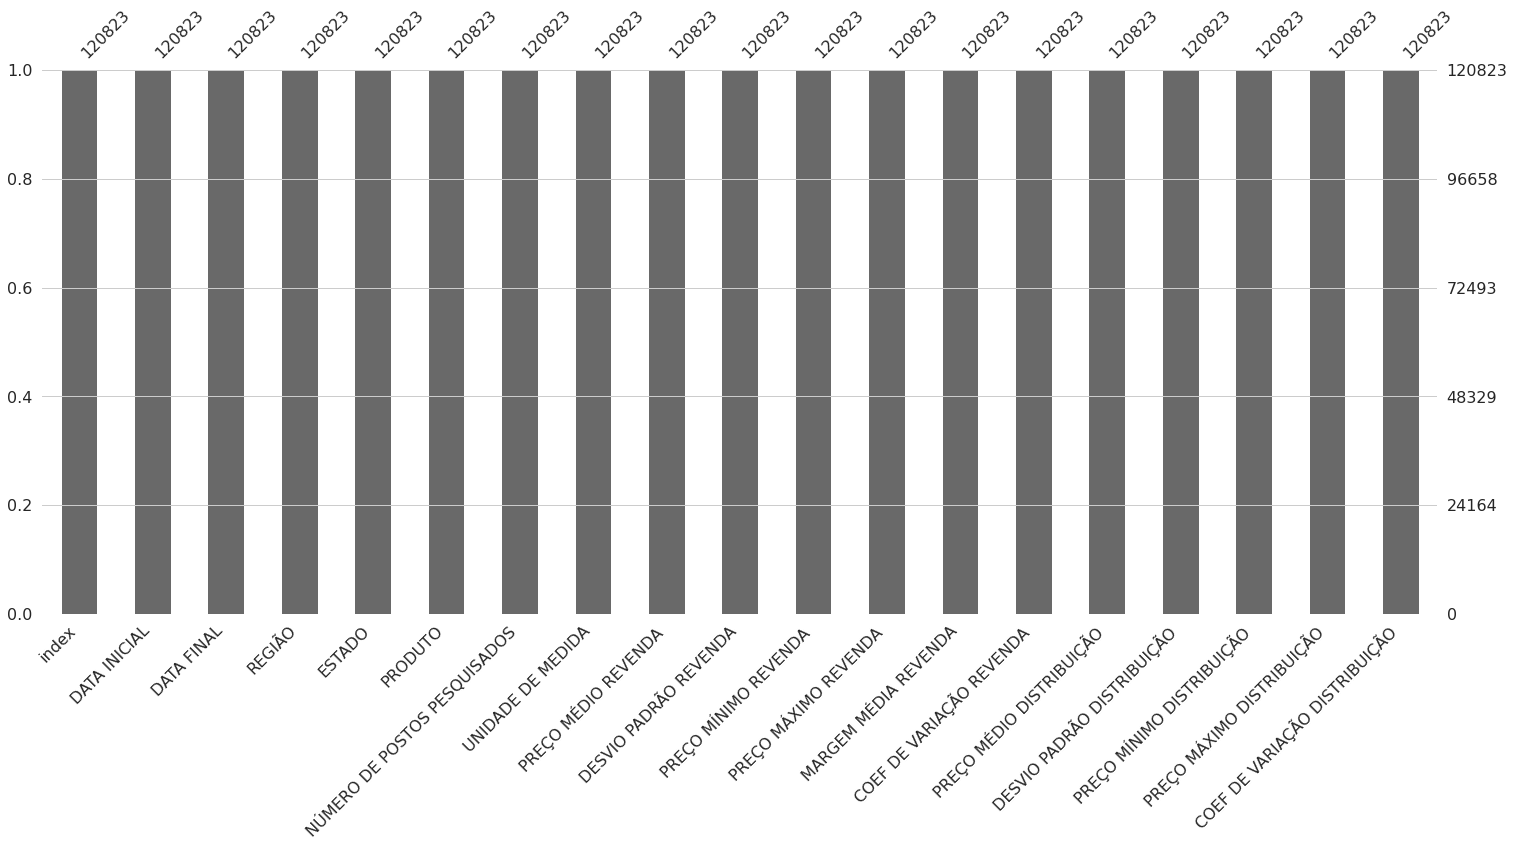

In [22]:
# Investigando dados faltantes
import missingno as msno
msno.bar((df))
plt.show()

In [23]:
df.isnull().mean()*100

index                            0.0
DATA INICIAL                     0.0
DATA FINAL                       0.0
REGIÃO                           0.0
ESTADO                           0.0
PRODUTO                          0.0
NÚMERO DE POSTOS PESQUISADOS     0.0
UNIDADE DE MEDIDA                0.0
PREÇO MÉDIO REVENDA              0.0
DESVIO PADRÃO REVENDA            0.0
PREÇO MÍNIMO REVENDA             0.0
PREÇO MÁXIMO REVENDA             0.0
MARGEM MÉDIA REVENDA             0.0
COEF DE VARIAÇÃO REVENDA         0.0
PREÇO MÉDIO DISTRIBUIÇÃO         0.0
DESVIO PADRÃO DISTRIBUIÇÃO       0.0
PREÇO MÍNIMO DISTRIBUIÇÃO        0.0
PREÇO MÁXIMO DISTRIBUIÇÃO        0.0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0.0
dtype: float64

# Preenchendo dados faltantes com a mediana 

In [24]:
coef_mediana = df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].median()
print(coef_mediana)

0.028999999999999998


In [25]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].fillna(coef_mediana, inplace=True)

In [26]:
preco_maximo_dist_mediana = df['PREÇO MÁXIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÁXIMO DISTRIBUIÇÃO'].fillna(preco_maximo_dist_mediana, inplace=True)

In [27]:
preco_min_dist_mediana = df['PREÇO MÍNIMO DISTRIBUIÇÃO'].median()
df['PREÇO MÍNIMO DISTRIBUIÇÃO'].fillna(preco_min_dist_mediana, inplace=True)

In [28]:
desvio_padrao_dist_mediana = df['DESVIO PADRÃO DISTRIBUIÇÃO'].median()
df['DESVIO PADRÃO DISTRIBUIÇÃO'].fillna(desvio_padrao_dist_mediana, inplace=True)

In [29]:
preco_medio_dist_mediana = df['PREÇO MÉDIO DISTRIBUIÇÃO'].median()
df['PREÇO MÉDIO DISTRIBUIÇÃO'].fillna(preco_medio_dist_mediana, inplace=True)

In [30]:
margem_media_rev_mediana = df['MARGEM MÉDIA REVENDA'].median()
df['MARGEM MÉDIA REVENDA'].fillna(margem_media_rev_mediana, inplace=True)

In [31]:
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].isnull().sum()

0

In [32]:
df.isnull().sum()

index                            0
DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

# EDA

In [33]:
# Variavel de interesse
target = 'PREÇO MÉDIO REVENDA'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'categorical vars({len(cat_vars)}): {cat_vars}')


target: PREÇO MÉDIO REVENDA
numerical vars(12): ['index', 'NÚMERO DE POSTOS PESQUISADOS', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA', 'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']
categorical vars(6): ['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO', 'UNIDADE DE MEDIDA']


In [34]:
# Sumário estatístico
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

index  NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
count  120823.00                     120823.00            120823.00   
mean    60411.00                        221.07                11.47   
std     34878.74                        387.94                19.16   
min         0.00                          1.00                 0.77   
25%     30205.50                         39.00                 2.16   
50%     60411.00                         99.00                 2.90   
75%     90616.50                        226.00                 4.03   
95%    114780.90                        843.00                58.05   
99%    119613.78                       2360.00                78.07   
max    120822.00                       4167.00               107.50   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
count              120823.00             120823.00             120823.00   
mean                    0.68                  9.98                 13.23   
std                     1.40                 16.43                 22.45   
min                     0.00                  0.59                  1.00   
25%                     0.08                  1.99                  2.42   
50%                     0.12                  2.69                  3.20   
75%                     0.20                  3.79                  4.59   
95%                     3.98                 48.00                 69.00   
99%                     6.41                 69.99                 91.00   
max                    10.75                100.00                120.00   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
count             120823.00                 120823.00   
mean               -4563.99                      0.05   
std                20875.41                      0.02   
min               -99999.00                      0.00   
25%                    0.26                      0.03   
50%                    0.37                      0.04   
75%                    0.54                      0.06   
95%                   13.22                      0.09   
99%                   19.88                      0.12   
max                   36.85                      0.40   

       PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
count                 120823.00                   120823.00   
mean                   -4550.43                    -4558.15   
std                    20860.53                    20858.84   
min                   -99999.00                   -99999.00   
25%                        1.71                        0.04   
50%                        2.32                        0.07   
75%                        3.32                        0.14   
95%                       40.09                        3.35   
99%                       56.94                        5.84   
max                       83.14                       18.39   

       PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
count                  120823.00                  120823.00   
mean                    -4551.52                   -4549.24   
std                     20860.29                   20860.79   
min                    -99999.00                  -99999.00   
25%                         1.59                       1.86   
50%                         2.21                       2.50   
75%                         3.16                       3.54   
95%                        34.90                      47.00   
99%                        50.00                      69.42   
max                        83.00                      94.50   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO  
count                      120823.00  
mean                        -4558.65  
std                         20858.73  
min                        -99999.00  
25%                             0.02  
50%                             0.03  
75%                             0.06  
95%                             0.12  
99%                      

In [35]:
# Investigando linhas com dados de valores mínimos de -99999
df[df['MARGEM MÉDIA REVENDA']==-99999.00].head()

index DATA INICIAL DATA FINAL    REGIÃO          ESTADO PRODUTO  \
106906  106906   2019-06-30 2019-07-06   SUDESTE  ESPIRITO SANTO     GNV   
106907  106907   2019-06-30 2019-07-06  NORDESTE        MARANHAO     GNV   
106909  106909   2019-06-30 2019-07-06   SUDESTE    MINAS GERAIS     GNV   
106911  106911   2019-06-30 2019-07-06       SUL          PARANA     GNV   
106912  106912   2019-06-30 2019-07-06  NORDESTE      PERNAMBUCO     GNV   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
106906                             6             R$/m3                3.296   
106907                             1             R$/m3                3.499   
106909                             6             R$/m3                3.462   
106911                             2             R$/m3                3.099   
106912                            11             R$/m3                2.699   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
106906                  0.005                 3.290                 3.299   
106907                  0.000                 3.499                 3.499   
106909                  0.140                 3.347                 3.699   
106911                  0.141                 2.999                 3.199   
106912                  0.272                 2.699                 3.600   

        MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
106906              -99999.0                     0.002   
106907              -99999.0                     0.000   
106909              -99999.0                     0.040   
106911              -99999.0                     0.045   
106912              -99999.0                     0.101   

        PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
106906                 -99999.00                    -99999.0   
106907                 -99999.00                    -99999.0   
106909                 -99999.00                    -99999.0   
106911                 -99999.00                    -99999.0   
106912                      3.07                         0.0   

        PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
106906                  -99999.00                  -99999.00   
106907                  -99999.00                  -99999.00   
106909                  -99999.00                  -99999.00   
106911                  -99999.00                  -99999.00   
106912                       3.07                       3.07   

        COEF DE VARIAÇÃO DISTRIBUIÇÃO  
106906                       -99999.0  
106907                       -99999.0  
106909                       -99999.0  
106911                       -99999.0  
106912                            0.0

In [36]:
columns= ['PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO' ,'PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO' ,'MARGEM MÉDIA REVENDA' ]
for col in columns:
    df[col] = df[col].replace(-99999.0, 0)

In [37]:
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

index  NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
count  120823.00                     120823.00            120823.00   
mean    60411.00                        221.07                11.47   
std     34878.74                        387.94                19.16   
min         0.00                          1.00                 0.77   
25%     30205.50                         39.00                 2.16   
50%     60411.00                         99.00                 2.90   
75%     90616.50                        226.00                 4.03   
95%    114780.90                        843.00                58.05   
99%    119613.78                       2360.00                78.07   
max    120822.00                       4167.00               107.50   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
count              120823.00             120823.00             120823.00   
mean                    0.68                  9.98                 13.23   
std                     1.40                 16.43                 22.45   
min                     0.00                  0.59                  1.00   
25%                     0.08                  1.99                  2.42   
50%                     0.12                  2.69                  3.20   
75%                     0.20                  3.79                  4.59   
95%                     3.98                 48.00                 69.00   
99%                     6.41                 69.99                 91.00   
max                    10.75                100.00                120.00   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
count             120823.00                 120823.00   
mean                   2.15                      0.05   
std                    4.46                      0.02   
min                    0.00                      0.00   
25%                    0.26                      0.03   
50%                    0.37                      0.04   
75%                    0.54                      0.06   
95%                   13.22                      0.09   
99%                   19.88                      0.12   
max                   36.85                      0.40   

       PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
count                 120823.00                   120823.00   
mean                       8.26                        0.54   
std                       14.01                        1.26   
min                        0.00                        0.00   
25%                        1.71                        0.04   
50%                        2.32                        0.07   
75%                        3.32                        0.14   
95%                       40.09                        3.35   
99%                       56.94                        5.84   
max                       83.14                       18.39   

       PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
count                  120823.00                  120823.00   
mean                        7.17                       9.45   
std                        12.08                      16.35   
min                         0.00                       0.00   
25%                         1.59                       1.86   
50%                         2.21                       2.50   
75%                         3.16                       3.54   
95%                        34.90                      47.00   
99%                        50.00                      69.42   
max                        83.00                      94.50   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO  
count                      120823.00  
mean                            0.04  
std                             0.04  
min                             0.00  
25%                             0.02  
50%                             0.03  
75%                             0.06  
95%                             0.12  
99%                      

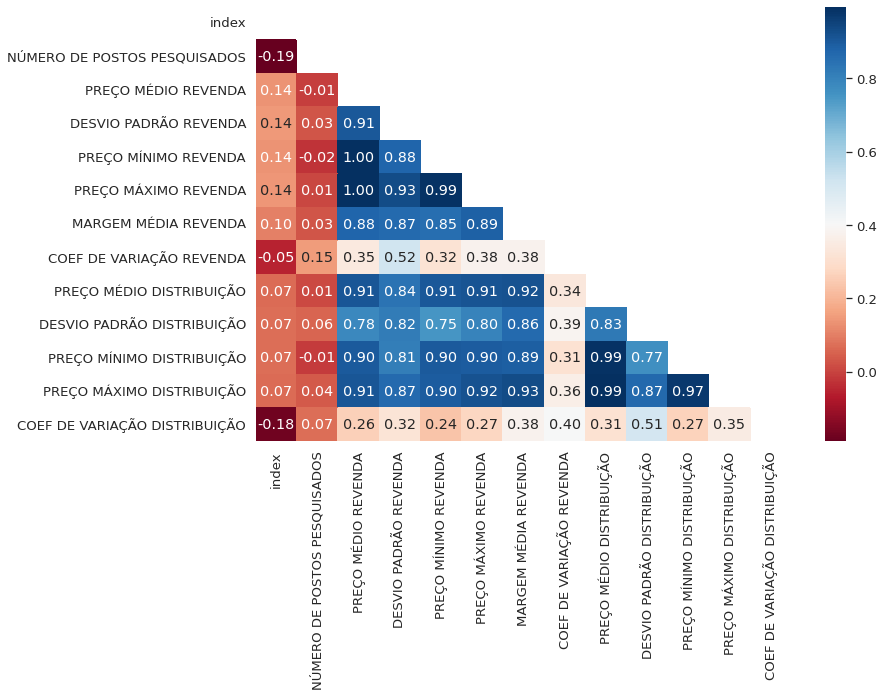

In [38]:
# Matriz de correlação
sns.set_context(font_scale = 5.0)
plt.figure(figsize = (12,8))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(df.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

## Investigando a distribuição da target e transformação logarítmica

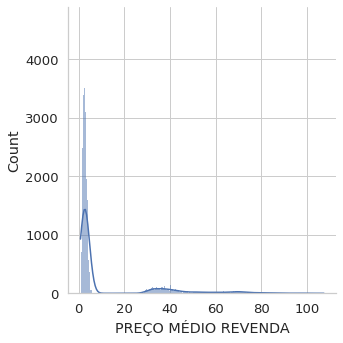

In [39]:
sns.displot(df, x="PREÇO MÉDIO REVENDA", kde=True)

In [40]:
df['LOGPREÇO MÉDIO REVENDA'] = np.log(df['PREÇO MÉDIO REVENDA'].values)


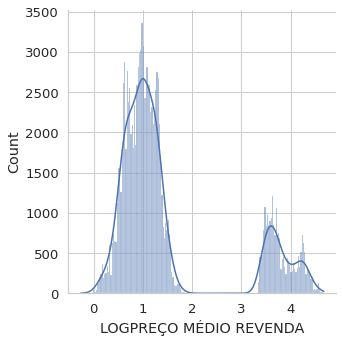

In [41]:
sns.displot(df, x="LOGPREÇO MÉDIO REVENDA", kde=True)

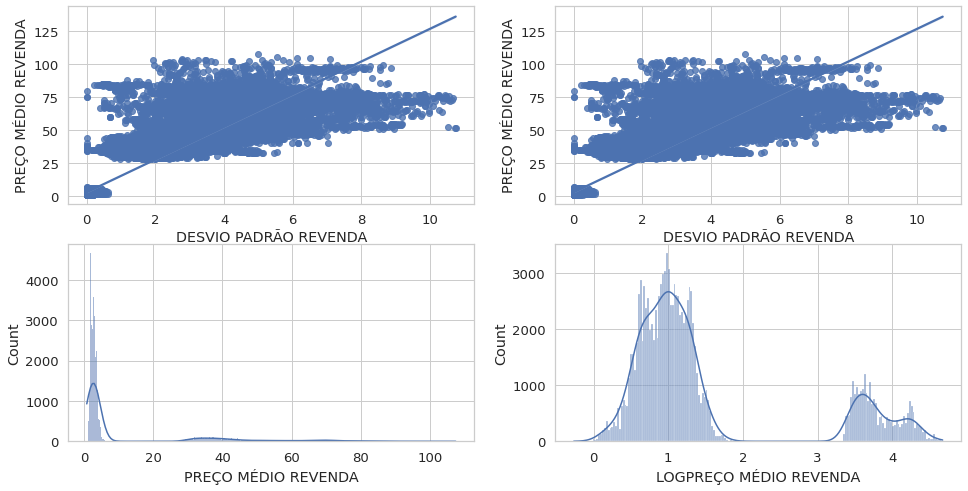

In [42]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)

sns.histplot(x=df['PREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][0])
sns.histplot(x=df['LOGPREÇO MÉDIO REVENDA'], kde=True, ax=axs[1][1])

sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][0])
sns.regplot(x='DESVIO PADRÃO REVENDA', y='PREÇO MÉDIO REVENDA', data=df, ax=axs[0][1])

plt.show()

In [43]:
df_novo = pd.read_csv('2004-2021.tsv',sep='\t', encoding='utf-8', parse_dates=['DATA INICIAL', 'DATA FINAL']).reset_index()

<AxesSubplot:xlabel='DATA INICIAL', ylabel='PREÇO MÉDIO REVENDA'>

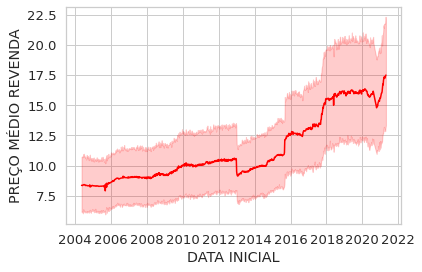

In [44]:
sns.lineplot(data=df, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

<AxesSubplot:xlabel='DATA INICIAL', ylabel='PREÇO MÉDIO REVENDA'>

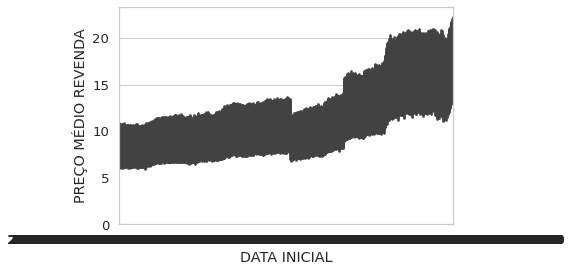

In [45]:
sns.barplot(data=df, x='DATA INICIAL', y='PREÇO MÉDIO REVENDA', color='red')

In [46]:
df['PREÇO MÉDIO REVENDA']

0         1.288
1         1.162
2         1.389
3         1.262
4         1.181
          ...  
120818    4.582
120819    4.141
120820    4.246
120821    4.464
120822    4.352
Name: PREÇO MÉDIO REVENDA, Length: 120823, dtype: float64

In [47]:
px.line(
    df.query('ESTADO == "SAO PAULO" and PRODUTO != "GLP"'),
    x='DATA INICIAL',
    y='PREÇO MÉDIO REVENDA',
    color='PRODUTO',
    labels={'DATA INICIAL':'Data', 'PREÇO MÉDIO REVENDA':'Preço médio de revenda'},
    title='Preços médios de revenda para vários combustíveis entre 2004 e 2021'
)

In [48]:
fig = go.Figure() # Inicializando uma figura

fig.add_trace(go.Scatter(
    x=df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='São Paulo',
    line=dict(color='red', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['DATA INICIAL'],
    y=df.query('ESTADO == "RIO DE JANEIRO" and PRODUTO == "GASOLINA COMUM"')['PREÇO MÉDIO REVENDA'],
    mode='lines',
    name='Rio de Janeiro',
    line=dict(color='green', width=2, dash='dashdot')
))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    yaxis=dict(
        showline=True,
        showticklabels=True,
        gridcolor='rgb(200, 200, 200)',
        linecolor='rgb(150, 150, 150)',
        linewidth=3,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=14,
        )
    ),
    
    plot_bgcolor='white',
    title='Preço da gasolina em SP e RJ'
)

fig

In [49]:
# Calculando o VIF das melhores features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['LOGPREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA','PREÇO MÁXIMO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO REVENDA']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature        VIF
0     LOGPREÇO MÉDIO REVENDA   8.251936
1      DESVIO PADRÃO REVENDA   5.601119
2  PREÇO MÁXIMO DISTRIBUIÇÃO  36.562756
3  PREÇO MÍNIMO DISTRIBUIÇÃO  28.851018
4   COEF DE VARIAÇÃO REVENDA   2.995847


In [50]:
data = df.copy()

In [51]:
print("Média: {:.2f}".format(data['PREÇO MÉDIO REVENDA'].mean()))
print("Desvio padrão: {:.2f}".format(data['PREÇO MÉDIO REVENDA'].std()))

Média: 11.47
Desvio padrão: 19.16


In [52]:
# Copiando o dataset para facilitar o acompanhamento
data_resample = data.copy()

# Incluindo o campo Date como índice
data_resample.set_index('DATA INICIAL', 'DATA FINAL',inplace=True) # Inplace para fazer a operação permanente no Dataset

# Checando o dataset final
data_resample.head()

index DATA FINAL        REGIÃO              ESTADO  \
DATA INICIAL                                                       
2004-05-09        0 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
2004-05-09        1 2004-05-15  CENTRO OESTE               GOIAS   
2004-05-09        2 2004-05-15  CENTRO OESTE         MATO GROSSO   
2004-05-09        3 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
2004-05-09        4 2004-05-15      NORDESTE             ALAGOAS   

                       PRODUTO  NÚMERO DE POSTOS PESQUISADOS  \
DATA INICIAL                                                   
2004-05-09    ETANOL HIDRATADO                           127   
2004-05-09    ETANOL HIDRATADO                           387   
2004-05-09    ETANOL HIDRATADO                           192   
2004-05-09    ETANOL HIDRATADO                           162   
2004-05-09    ETANOL HIDRATADO                           103   

             UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  \
DATA INICIAL                                                                 
2004-05-09                R$/l                1.288                  0.016   
2004-05-09                R$/l                1.162                  0.114   
2004-05-09                R$/l                1.389                  0.097   
2004-05-09                R$/l                1.262                  0.070   
2004-05-09                R$/l                1.181                  0.078   

              PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
DATA INICIAL                                               
2004-05-09                    1.19                 1.350   
2004-05-09                    0.89                 1.449   
2004-05-09                    1.18                 1.760   
2004-05-09                    1.09                 1.509   
2004-05-09                    1.05                 1.400   

              MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
DATA INICIAL                                                   
2004-05-09                   0.463                     0.012   
2004-05-09                   0.399                     0.098   
2004-05-09                   0.419                     0.070   
2004-05-09                   0.432                     0.055   
2004-05-09                   0.240                     0.066   

              PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
DATA INICIAL                                                         
2004-05-09                       0.825                       0.110   
2004-05-09                       0.763                       0.088   
2004-05-09                       0.970                       0.095   
2004-05-09                       0.830                       0.119   
2004-05-09                       0.941                       0.077   

              PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
DATA INICIAL                                                         
2004-05-09                       0.4201                    0.96660   
2004-05-09                       0.5013                    1.05000   
2004-05-09                       0.5614                    1.16100   
2004-05-09                       0.5991                    1.22242   
2004-05-09                       0.7441                    1.03170   

              COEF DE VARIAÇÃO DISTRIBUIÇÃO  LOGPREÇO MÉDIO REVENDA  
DATA INICIAL                                                         
2004-05-09                            0.133                0.253091  
2004-05-09                            0.115                0.150143  
2004-05-09                            0.098                0.328584  
2004-05-09                            0.143                0.232698  
2004-05-09                            0.082                0.166362

In [53]:
data_resample = data_resample.resample('6M') # Reagrupando pelo bimestre, 'M' indica 'Month', porém temos mais quebras possíveis!
data_resample

In [54]:
# Extraindo a média
data_resample.mean()

index  NÚMERO DE POSTOS PESQUISADOS  \
DATA INICIAL                                                
2004-05-31     21969.280488                    345.016260   
2004-11-30     22436.802611                    344.149829   
2005-05-31     23131.895161                    341.630893   
2005-11-30     23786.448008                    301.141796   
2006-05-31     24408.145161                    347.027295   
2006-11-30     25166.968586                    327.331075   
2007-05-31     25813.485194                    317.565392   
2007-11-30     26436.373259                    276.992881   
2008-05-31     27136.566667                    264.444444   
2008-11-30     27725.267066                    270.981437   
2009-05-31     28487.204384                    269.717505   
2009-11-30     29142.895757                    213.327431   
2010-05-31     29789.508475                    250.122034   
2010-11-30     30452.344020                    263.467941   
2011-05-31     31108.363468                    264.029312   
2011-11-30     31797.766626                    264.615764   
2012-05-31     32415.201670                    264.871946   
2012-11-30     33135.116000                    261.657538   
2013-05-31     54176.846314                    226.877572   
2013-11-30     60933.500000                    224.326273   
2014-05-31     64900.500000                    226.812500   
2014-11-30     68943.000000                    229.009230   
2015-05-31     72985.000000                    227.436602   
2015-11-30     76872.000000                    149.649068   
2016-05-31     80745.500000                    158.477157   
2016-11-30     84682.000000                    160.639207   
2017-05-31     88617.000000                    160.233426   
2017-11-30     92538.500000                    108.848694   
2018-05-31     96451.500000                    137.947449   
2018-11-30    100366.500000                    153.885166   
2019-05-31    104273.000000                    156.122982   
2019-11-30    108174.000000                    156.637343   
2020-05-31    112169.500000                    154.742669   
2020-11-30    115661.000000                    107.378416   
2021-05-31    118964.500000                     74.661464   

              PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  \
DATA INICIAL                                               
2004-05-31               8.360211               0.420415   
2004-11-30               8.350386               0.454308   
2005-05-31               8.314554               0.471545   
2005-11-30               8.375137               0.442628   
2006-05-31               8.779410               0.409859   
2006-11-30               8.983649               0.419681   
2007-05-31               9.038625               0.442960   
2007-11-30               9.022594               0.468214   
2008-05-31               9.020558               0.485573   
2008-11-30               9.267025               0.481981   
2009-05-31               9.296739               0.493719   
2009-11-30               9.715211               0.475294   
2010-05-31              10.056599               0.510215   
2010-11-30              10.016973               0.508097   
2011-05-31              10.148791               0.515259   
2011-11-30              10.292394               0.542197   
2012-05-31              10.443732               0.559137   
2012-11-30              10.469277               0.586329   
2013-05-31               9.520318               0.547783   
2013-11-30               9.584677               0.585058   
2014-05-31               9.894731               0.621617   
2014-11-30              10.166380               0.699415   
2015-05-31              10.702818               0.743335   
2015-11-30              11.666702               0.774772   
2016-05-31              12.648557               0.841689   
2016-11-30              12.716040               0.910151   
2017-05-31              13.166841               0.974150   
2017-11-30              

In [55]:
# Desvio padrão
data_resample.std()

index  NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
DATA INICIAL                                                                    
2004-05-31    15994.799175                    634.494462            12.914804   
2004-11-30    15953.169938                    633.175180            12.700700   
2005-05-31    15916.684584                    627.371531            12.369102   
2005-11-30    15886.699897                    538.539854            12.409316   
2006-05-31    15857.249781                    543.011436            12.798793   
2006-11-30    15809.472552                    513.421576            13.280776   
2007-05-31    15784.611973                    535.683291            13.430339   
2007-11-30    15765.267225                    458.077930            13.460924   
2008-05-31    15728.381888                    412.685834            13.388281   
2008-11-30    15722.545722                    413.543184            13.610985   
2009-05-31    15670.750391                    413.394596            13.730920   
2009-11-30    15642.752367                    351.947818            14.658352   
2010-05-31    15613.392727                    391.964478            15.151836   
2010-11-30    15588.961566                    410.189392            15.139057   
2011-05-31    15567.390013                    410.174211            15.162695   
2011-11-30    15533.959786                    409.812977            15.433399   
2012-05-31    15529.159577                    410.056860            15.629416   
2012-11-30    15482.541504                    407.404746            15.691700   
2013-05-31     9799.469477                    379.604799            15.158151   
2013-11-30     1145.029912                    370.583580            15.505093   
2014-05-31     1145.607263                    370.056403            15.907325   
2014-11-30     1188.619858                    369.865017            16.428198   
2015-05-31     1145.318587                    367.871445            17.200128   
2015-11-30     1099.130565                    264.794718            19.089097   
2016-05-31     1137.524359                    249.402000            20.497630   
2016-11-30     1135.503633                    252.943461            20.664957   
2017-05-31     1136.658333                    253.679168            21.508552   
2017-11-30     1127.709404                    181.041648            23.060338   
2018-05-31     1131.750856                    231.336064            25.882817   
2018-11-30     1128.864105                    247.943641            26.290637   
2019-05-31     1126.843379                    249.747473            26.511831   
2019-11-30     1125.688678                    250.488448            26.434027   
2020-05-31     1181.402980                    250.175178            26.754386   
2020-11-30      834.704139                    202.362365            26.709902   
2021-05-31     1072.861128                    130.097245            28.749248   

              DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
DATA INICIAL                                                
2004-05-31                 0.742166             11.298613   
2004-11-30                 0.810500             10.992600   
2005-05-31                 0.842972             10.883509   
2005-11-30                 0.785374             11.035733   
2006-05-31                 0.700843             11.380841   
2006-11-30                 0.711538             11.831395   
2007-05-31                 0.726586             11.924977   
2007-11-30                 0.767474             11.847892   
2008-05-31                 0.814078             11.691286   
2008-11-30                 0.803311             11.953602   
2009-05-31                 0.816805             11.986701   
2009-11-30                 0.824482             12.945125   
2010-05-31                 0.872326             13.120238   
2010-11-30                 0.840520             12.983563   
2011-05-31                 0.859169            

In [56]:
data_resample.agg(['mean','std'])

index               NÚMERO DE POSTOS PESQUISADOS  \
                       mean           std                         mean   
DATA INICIAL                                                             
2004-05-31     21969.280488  15994.799175                   345.016260   
2004-11-30     22436.802611  15953.169938                   344.149829   
2005-05-31     23131.895161  15916.684584                   341.630893   
2005-11-30     23786.448008  15886.699897                   301.141796   
2006-05-31     24408.145161  15857.249781                   347.027295   
2006-11-30     25166.968586  15809.472552                   327.331075   
2007-05-31     25813.485194  15784.611973                   317.565392   
2007-11-30     26436.373259  15765.267225                   276.992881   
2008-05-31     27136.566667  15728.381888                   264.444444   
2008-11-30     27725.267066  15722.545722                   270.981437   
2009-05-31     28487.204384  15670.750391                   269.717505   
2009-11-30     29142.895757  15642.752367                   213.327431   
2010-05-31     29789.508475  15613.392727                   250.122034   
2010-11-30     30452.344020  15588.961566                   263.467941   
2011-05-31     31108.363468  15567.390013                   264.029312   
2011-11-30     31797.766626  15533.959786                   264.615764   
2012-05-31     32415.201670  15529.159577                   264.871946   
2012-11-30     33135.116000  15482.541504                   261.657538   
2013-05-31     54176.846314   9799.469477                   226.877572   
2013-11-30     60933.500000   1145.029912                   224.326273   
2014-05-31     64900.500000   1145.607263                   226.812500   
2014-11-30     68943.000000   1188.619858                   229.009230   
2015-05-31     72985.000000   1145.318587                   227.436602   
2015-11-30     76872.000000   1099.130565                   149.649068   
2016-05-31     80745.500000   1137.524359                   158.477157   
2016-11-30     84682.000000   1135.503633                   160.639207   
2017-05-31     88617.000000   1136.658333                   160.233426   
2017-11-30     92538.500000   1127.709404                   108.848694   
2018-05-31     96451.500000   1131.750856                   137.947449   
2018-11-30    100366.500000   1128.864105                   153.885166   
2019-05-31    104273.000000   1126.843379                   156.122982   
2019-11-30    108174.000000   1125.688678                   156.637343   
2020-05-31    112169.500000   1181.402980                   154.742669   
2020-11-30    115661.000000    834.704139                   107.378416   
2021-05-31    118964.500000   1072.861128                    74.661464   

                         PREÇO MÉDIO REVENDA            DESVIO PADRÃO REVENDA  \
                     std                mean        std                  mean   
DATA INICIAL                                                                    
2004-05-31    634.494462            8.360211  12.914804              0.420415   
2004-11-30    633.175180            8.350386  12.700700              0.454308   
2005-05-31    627.371531            8.314554  12.369102              0.471545   
2005-11-30    538.539854            8.375137  12.409316              0.442628   
2006-05-31    543.011436            8.779410  12.798793              0.409859   
2006-11-30    513.421576            8.983649  13.280776              0.419681   
2007-05-31    535.683291            9.038625  13.430339              0.442960   
2007-11-30    458.077930            9.022594  13.460924              0.468214   
2008-05-31    412.685834            9.020558  13.388281              0.485573   
2008-11-30    413.543184            9.267025  13.610985              0.481981   
2009-05-31    413.394596            9.296739  13.730920              0.493719   
2009-11-30    351.947818            9.715211  14.658352              0.4752

In [57]:
data.set_index('DATA INICIAL').resample('6M').agg(['mean','std'])

index               NÚMERO DE POSTOS PESQUISADOS  \
                       mean           std                         mean   
DATA INICIAL                                                             
2004-05-31     21969.280488  15994.799175                   345.016260   
2004-11-30     22436.802611  15953.169938                   344.149829   
2005-05-31     23131.895161  15916.684584                   341.630893   
2005-11-30     23786.448008  15886.699897                   301.141796   
2006-05-31     24408.145161  15857.249781                   347.027295   
2006-11-30     25166.968586  15809.472552                   327.331075   
2007-05-31     25813.485194  15784.611973                   317.565392   
2007-11-30     26436.373259  15765.267225                   276.992881   
2008-05-31     27136.566667  15728.381888                   264.444444   
2008-11-30     27725.267066  15722.545722                   270.981437   
2009-05-31     28487.204384  15670.750391                   269.717505   
2009-11-30     29142.895757  15642.752367                   213.327431   
2010-05-31     29789.508475  15613.392727                   250.122034   
2010-11-30     30452.344020  15588.961566                   263.467941   
2011-05-31     31108.363468  15567.390013                   264.029312   
2011-11-30     31797.766626  15533.959786                   264.615764   
2012-05-31     32415.201670  15529.159577                   264.871946   
2012-11-30     33135.116000  15482.541504                   261.657538   
2013-05-31     54176.846314   9799.469477                   226.877572   
2013-11-30     60933.500000   1145.029912                   224.326273   
2014-05-31     64900.500000   1145.607263                   226.812500   
2014-11-30     68943.000000   1188.619858                   229.009230   
2015-05-31     72985.000000   1145.318587                   227.436602   
2015-11-30     76872.000000   1099.130565                   149.649068   
2016-05-31     80745.500000   1137.524359                   158.477157   
2016-11-30     84682.000000   1135.503633                   160.639207   
2017-05-31     88617.000000   1136.658333                   160.233426   
2017-11-30     92538.500000   1127.709404                   108.848694   
2018-05-31     96451.500000   1131.750856                   137.947449   
2018-11-30    100366.500000   1128.864105                   153.885166   
2019-05-31    104273.000000   1126.843379                   156.122982   
2019-11-30    108174.000000   1125.688678                   156.637343   
2020-05-31    112169.500000   1181.402980                   154.742669   
2020-11-30    115661.000000    834.704139                   107.378416   
2021-05-31    118964.500000   1072.861128                    74.661464   

                         PREÇO MÉDIO REVENDA            DESVIO PADRÃO REVENDA  \
                     std                mean        std                  mean   
DATA INICIAL                                                                    
2004-05-31    634.494462            8.360211  12.914804              0.420415   
2004-11-30    633.175180            8.350386  12.700700              0.454308   
2005-05-31    627.371531            8.314554  12.369102              0.471545   
2005-11-30    538.539854            8.375137  12.409316              0.442628   
2006-05-31    543.011436            8.779410  12.798793              0.409859   
2006-11-30    513.421576            8.983649  13.280776              0.419681   
2007-05-31    535.683291            9.038625  13.430339              0.442960   
2007-11-30    458.077930            9.022594  13.460924              0.468214   
2008-05-31    412.685834            9.020558  13.388281              0.485573   
2008-11-30    413.543184            9.267025  13.610985              0.481981   
2009-05-31    413.394596            9.296739  13.730920              0.493719   
2009-11-30    351.947818            9.715211  14.658352              0.4752

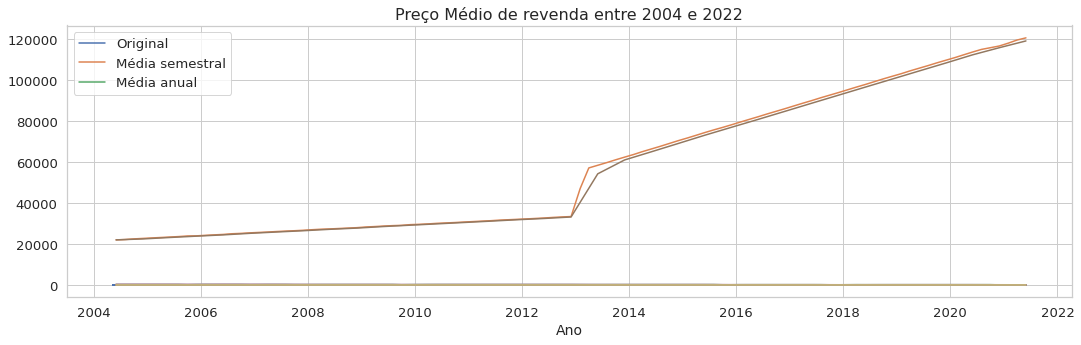

In [58]:
plt.figure(figsize=(18,5))
plt.plot(data['DATA INICIAL'],data['PREÇO MÉDIO REVENDA']) # Série original
# Série mensal
data_mensal = data.set_index('DATA INICIAL').resample('2M').mean()
plt.plot(data_mensal) # Série mensal
# Série semanal
data_quinzenal = data.set_index('DATA INICIAL').resample('6M').mean()
plt.plot(data_quinzenal) # Série semanal
# Acertando detalhes do gráfico
plt.xlabel('Ano',size=14)
plt.xlabel('Ano',size=14)
plt.title('Preço Médio de revenda entre 2004 e 2022',size=16)
plt.legend(['Original','Média semestral','Média anual'])
plt.show()

In [59]:
# Importando módulos de teste
from statsmodels.tsa.stattools import adfuller

#### Este é um teste de hipótese que determina as seguintes hipóteses:
#### Hipótese nula (H0): A série não é estacionária
#### Hipótese nula (H1): A série é estacionária
#### A série poderá ser considerada estacionária se o p-valor do teste for menor do que a significância que determinarmos; normalmente usamos 5%

In [60]:
# Instanciando o teste (o p-valor é sempre o SEGUNDO número da tupla)
#teste_fuller_estac = adfuller(data['PREÇO MÉDIO REVENDA'])
#print("O p-valor do teste foi de {:.2f}".format(teste_fuller_estac[1]))

O p-valor do teste foi de 0.00


In [61]:
#teste_fuller_estac = adfuller(data['LOGPREÇO MÉDIO REVENDA'])
#print("O p-valor do teste foi de {:.2f}".format(teste_fuller_estac[1]))

O p-valor do teste foi de 0.00


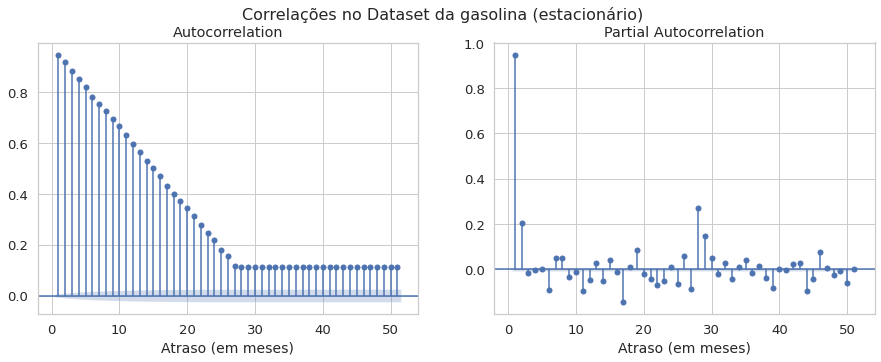

In [62]:
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Construindo os gráficos
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
plot_acf(data['PREÇO MÉDIO REVENDA'],ax=ax[0],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[0].set_xlabel('Atraso (em meses)',size=14)
plot_pacf(data['PREÇO MÉDIO REVENDA'],ax=ax[1],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[1].set_xlabel('Atraso (em meses)',size=14)
plt.suptitle("Correlações no Dataset da gasolina (estacionário)",size=16)
plt.show()

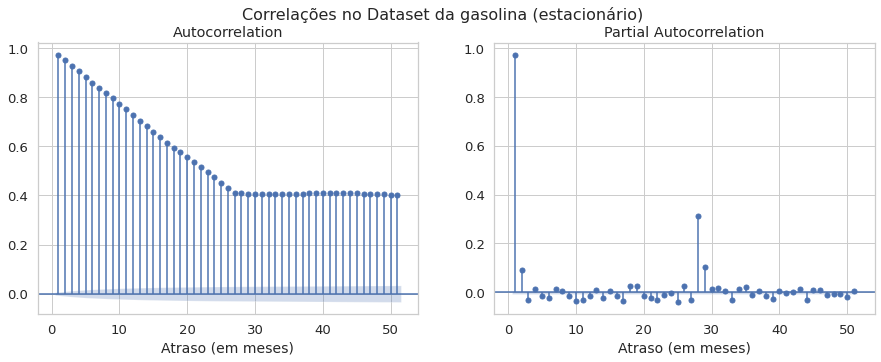

In [63]:
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Construindo os gráficos
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
plot_acf(data['LOGPREÇO MÉDIO REVENDA'],ax=ax[0],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[0].set_xlabel('Atraso (em meses)',size=14)
plot_pacf(data['LOGPREÇO MÉDIO REVENDA'],ax=ax[1],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[1].set_xlabel('Atraso (em meses)',size=14)
plt.suptitle("Correlações no Dataset da gasolina (estacionário)",size=16)
plt.show()

In [64]:
def plota_correlacoes(dataset, nome_dataset, unidade):
    fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
    plot_acf(dataset,ax=ax[0],zero=False) # Sem a ACF(0)
    ax[0].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plot_pacf(dataset,ax=ax[1],zero=False) # Sem a PACF(0)
    ax[1].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plt.suptitle("Correlações no Dataset de {}".format(nome_dataset,size=16))
    plt.show()
    return None # Não precisamos retornar nada

In [65]:
df = data.copy()
df.head()

index DATA INICIAL DATA FINAL        REGIÃO              ESTADO  \
0      0   2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
1      1   2004-05-09 2004-05-15  CENTRO OESTE               GOIAS   
2      2   2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO   
3      3   2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
4      4   2004-05-09 2004-05-15      NORDESTE             ALAGOAS   

            PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0  ETANOL HIDRATADO                           127              R$/l   
1  ETANOL HIDRATADO                           387              R$/l   
2  ETANOL HIDRATADO                           192              R$/l   
3  ETANOL HIDRATADO                           162              R$/l   
4  ETANOL HIDRATADO                           103              R$/l   

   PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
0                1.288                  0.016                  1.19   
1                1.162                  0.114                  0.89   
2                1.389                  0.097                  1.18   
3                1.262                  0.070                  1.09   
4                1.181                  0.078                  1.05   

   PREÇO MÁXIMO REVENDA  MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
0                 1.350                 0.463                     0.012   
1                 1.449                 0.399                     0.098   
2                 1.760                 0.419                     0.070   
3                 1.509                 0.432                     0.055   
4                 1.400                 0.240                     0.066   

   PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
0                     0.825                       0.110   
1                     0.763                       0.088   
2                     0.970                       0.095   
3                     0.830                       0.119   
4                     0.941                       0.077   

   PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
0                     0.4201                    0.96660   
1                     0.5013                    1.05000   
2                     0.5614                    1.16100   
3                     0.5991                    1.22242   
4                     0.7441                    1.03170   

   COEF DE VARIAÇÃO DISTRIBUIÇÃO  LOGPREÇO MÉDIO REVENDA  
0                          0.133                0.253091  
1                          0.115                0.150143  
2                          0.098                0.328584  
3                          0.143                0.232698  
4                          0.082                0.166362

In [66]:
print(df['DATA INICIAL'].min())
print(df['DATA FINAL'].max())

2004-05-09 00:00:00
2021-05-01 00:00:00


In [67]:
dado_esp = df.query('ESTADO == "SAO PAULO" and PRODUTO == "GASOLINA COMUM"')

In [68]:
novo = pd.DataFrame(dado_esp,columns=['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'LOGPREÇO MÉDIO REVENDA'])

In [69]:
teste_fuller_estac = adfuller(novo['LOGPREÇO MÉDIO REVENDA'])
print("O p-valor do teste foi de {:.2f}".format(teste_fuller_estac[1]))

O p-valor do teste foi de 0.98


In [70]:
df.columns

Index(['index', 'DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'LOGPREÇO MÉDIO REVENDA'],
      dtype='object')

In [71]:
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report